线性代数与方程组
===

# 1.方程组表示形式

假设我们有如下方程组
$$
\begin{cases}
2x-y&=0\\\\
-x+2y&=3
\end{cases}
$$
我们很轻易的可以找到方程组的解为$x=1,y=2$，图像如下

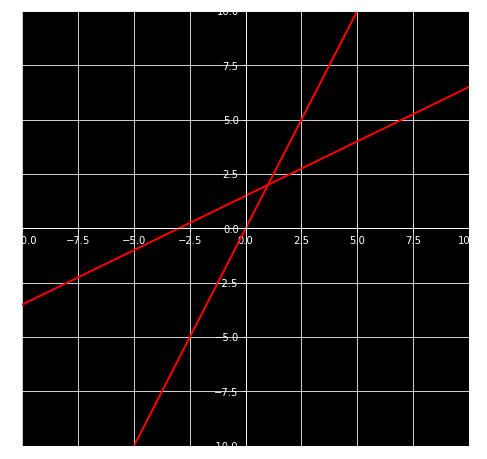

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

plt.figure(figsize=(8,8), facecolor='w')
x = np.linspace(-10, 10, 1000)
y = 2 * x

plt.plot(x, y, color="r", linewidth=2)

x1 = np.linspace(-10, 10, 1000)
y1 = (3 + x) / 2
plt.plot(x1, y1, color='r',linewidth=2)
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data',0))
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid(True)

## 1.1.方程组的矩阵表示形式与行图像
以上方程组可以用矩阵表示如下
$$
\begin{bmatrix}
2&-1\\\\
-1&2
\end{bmatrix} \times \begin{bmatrix}
x\\\\
y
\end{bmatrix}=\begin{bmatrix}
0\\\\
3
\end{bmatrix}
$$
AX=b的形式，这也就是线性方程组的矩阵表示形式，上图也是这个线性方程组的行图像

## 1.2.方程组的列图像
方程组同样还可以表示成如下形式
$$
x \times \begin{bmatrix}
2\\\\
-1
\end{bmatrix}+y \times \begin{bmatrix}
-1\\\\
2
\end{bmatrix}=\begin{bmatrix}
0\\\\
3
\end{bmatrix}
$$

我们在前面已经求解出来了$x=1,y=2$，那么上述等式可以变为下面的形式
$$
1 \times \begin{bmatrix}
2\\\\
-1
\end{bmatrix}+2 \times \begin{bmatrix}
-1\\\\
2
\end{bmatrix}=\begin{bmatrix}
0\\\\
3
\end{bmatrix}
$$

/Users/JJZHK/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/JJZHK/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


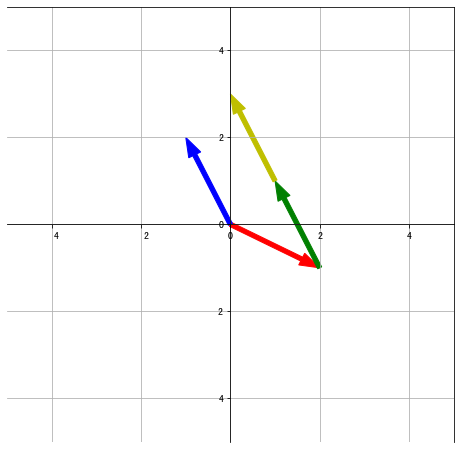

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8), facecolor='w')
plt.arrow(0, 0,2, -1, width=0.1,length_includes_head=True,color='r')
plt.arrow(0, 0,-1, 2, width=0.1,length_includes_head=True,color='b')

plt.arrow(2, -1, -1, 2, width=0.1,length_includes_head=True, color='g')
plt.arrow(1, 1, -1, 2, width=0.1,length_includes_head=True,color='y')

ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data',0))
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid(True)

我们来解释一下。我们在图上画了两个列向量$\begin{bmatrix}
2\\\\
-1
\end{bmatrix}$以及$\begin{bmatrix}
-1\\\\
2
\end{bmatrix}$，分别是红色向量和蓝色向量，那么怎么通过向量的计算来拟合到最后的答案呢。对于红色向量，由于系数$x=1$，那么就是红色向量本身，然后它需要加上2倍的蓝色向量。加上1倍的蓝色向量，就变成了绿色向量，然后在加上1倍的蓝色向量，就变成了黄色向量。黄色向量指的点就是$(0,3)$点，正好就是方程组的结果。

## 1.3.扩展到三元方程组
假设我们有如下方程组
$$
\begin{cases}
2x-y&=0\\\\
-x+2y-z&=-1\\\\
-3y+4z=4
\end{cases}
$$

可以写成如下列向量的形式
$$
x \times \begin{bmatrix}
2\\\\
-1\\\\
0
\end{bmatrix}+y \times \begin{bmatrix}
-1\\\\
2\\\\
-3
\end{bmatrix}+z \times \begin{bmatrix}
0\\\\
-1\\\\
4
\end{bmatrix}=\begin{bmatrix}
0\\\\
-1\\\\
4
\end{bmatrix}
$$

也是同样的，可以在三维图中画出向量然后进行拟合，可以得到最后的结果。那么对于$AX=b$来说，对于任意的b，是否都可以求解出结果呢？换个问法，列的线性组合是否能够覆盖整个三维空间？对于这个例子，答案是肯定的。因为这是一个很好的矩阵。因为它是非奇异矩阵，它是可逆矩阵。 比如如果这三个列向量在一个平面上，那么总有一个b，是通过这三个列向量无论如何也得不到的。

# 2.消元法解线性方程组
我们有如下线性方程组
$$
\begin{cases}
x+2y+z&=2\\\\
3x+8y+z&=12\\\\
4y+z=2
\end{cases}
$$

将其写为矩阵的形式
$$
\begin{bmatrix}
1&2&1\\\\
3&8&1\\\\
0&4&1
\end{bmatrix} \times \begin{bmatrix}
x\\\\
y\\\\
z
\end{bmatrix}=\begin{bmatrix}
2\\\\
12\\\\
2
\end{bmatrix}
$$

首先消除第二行的第一个元素，将第一行乘以3，然后跟第二行做减法，得到如下矩阵
$$
\begin{bmatrix}
1&2&1\\\
0&2&-2\\\
0&4&1
\end{bmatrix} \times \begin{bmatrix}
x\\\\
y\\\\
z
\end{bmatrix}=\begin{bmatrix}
0\\\\
6\\\\
2
\end{bmatrix}
$$

接下来将第三行的第二个元素消除，将第二行乘以2然后跟第三行做减法，得到如下矩阵
$$
\begin{bmatrix}
1&2&1\\\
0&2&-2\\\
0&0&5
\end{bmatrix} \times \begin{bmatrix}
x\\\\
y\\\\
z
\end{bmatrix}=\begin{bmatrix}
0\\\\
6\\\\
-10
\end{bmatrix}
$$

可以得到$z=-2,y=1,x=2$

# 3.消元法的矩阵表示

对于上面的例子，我们有系数矩阵
$$
\begin{bmatrix}
1&2&1\\\\
3&8&1\\\\
0&4&1
\end{bmatrix}
$$

那么我们怎么样叫它乘以一个矩阵，能够得到第一次消元后的结果呢
$$
\begin{bmatrix}
A
\end{bmatrix} \times \begin{bmatrix}
1&2&1\\\\
3&8&1\\\\
0&4&1
\end{bmatrix}=\begin{bmatrix}
1&2&1\\\
0&2&-2\\\
0&4&1
\end{bmatrix}
$$

我们知道矩阵第一三两行没有变，所以肯定有
$$
\begin{bmatrix}
1&0&0\\\\
A\\\\
0&0&1
\end{bmatrix} \times \begin{bmatrix}
1&2&1\\\\
3&8&1\\\\
0&4&1
\end{bmatrix}=\begin{bmatrix}
1&2&1\\\
0&2&-2\\\
0&4&1
\end{bmatrix}
$$

关键是确定第二行，第二行肯定不能是$0,1,0$，如果是这样的话，那就成了单位阵，系数矩阵乘以单位阵，不会发生任何变化。经过分析，我们是第一行乘以3然后和第二行做减法，于是有
$$
\begin{bmatrix}
1&0&0\\\\
-3&1&0\\\\
0&0&1
\end{bmatrix} \times \begin{bmatrix}
1&2&1\\\\
3&8&1\\\\
0&4&1
\end{bmatrix}=\begin{bmatrix}
1&2&1\\\
0&2&-2\\\
0&4&1
\end{bmatrix}
$$
我们设置$E_{21}$为第一个矩阵

$$
\begin{bmatrix}
1&0&0\\\\
0&1&0\\\\
0&-2&1
\end{bmatrix} \times \begin{bmatrix}
1&2&1\\\
0&2&-2\\\
0&4&1
\end{bmatrix}=\begin{bmatrix}
1&2&1\\\
0&2&-2\\\
0&0&5
\end{bmatrix}
$$
我们设置$E_{32}$为第一个矩阵

$$
E_{32} \times (E_{21} \times A) = U
$$
那么我们能否直接找到一个矩阵，能够从A直接变为U呢？我们只需要把$E_{32}$和$E_{21}$合并在一起就行了，于是就有
$$(E_{32} \times E_{21}) \times A=U$$

$$
\begin{bmatrix}
1&0&0\\\\
-3&1&0\\\\
0&0&1
\end{bmatrix} \times \begin{bmatrix}
1&0&0\\\\
0&1&0\\\\
0&-2&1
\end{bmatrix}=\begin{bmatrix}
1&0&0\\\\
-3&1&0\\\\
0&-2&1
\end{bmatrix}
$$